# Multiomics BRDC Paper — Figure 3

This Jupyter Notebook (with Python 3 kernel) contained the code of the proteogenomic analysis between Lesion and DCIS_Pure.

Input files:  
* The clinical file: clinical.csv
* The copy number alteration file: cna.csv
* The gene copy number file: gcnv.csv
* The gene copy number alteration file: gcna.csv
* The microenvironment file: microenvironment.csv
* The proteome file: pro.csv
* The xcell file: xcell.csv
* The proteome-based ssGSEA score: pscore.csv
* The phosphoproteome-based ssGSEA score: phoscore.csv
* The TF activity: tf.csv

Output figures and tables:  
* Figure 3A, 3B, 3C, 3D, 3E, 3F, 3G, 3H, and 3I

In [1]:
from brdc_utils import *

import warnings
warnings.filterwarnings("ignore")

In [2]:
outpath = '../figure/fig3'
if not os.path.isdir(outpath):
    os.mkdir(outpath)

clinical = pd.read_csv('../document/clinical.csv', index_col=0)
cna = pd.read_csv('../document/cna.csv', index_col=0)
gcnv = pd.read_csv('../document/gcnv.csv', index_col=0)
gcna = pd.read_csv('../document/gcna.csv', index_col=0)
me = pd.read_csv('../document/microenvironment.csv', index_col=0)
pro = pd.read_csv('../document/proteome.csv', index_col=0)
xcell = pd.read_csv('../document/xcell.csv', index_col=0)
pscore = pd.read_csv('../document/pscore.csv', index_col=0)
phoscore = pd.read_csv('../document/phoscore.csv', index_col=0)
tf = pd.read_csv('../document/tf.csv', index_col=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


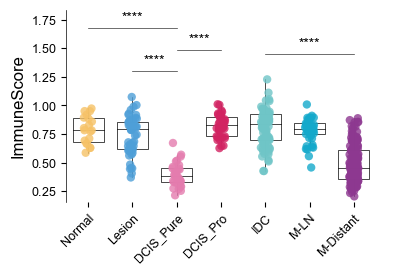

In [3]:
# figure 3A

order_ = ['Normal', 'Lesion', 'DCIS_Pure', 'DCIS_Pro', 'IDC', 'M-LN', 'M-Distant']
palette = ['#f6c267', '#4e9fd8', '#e47cae', '#d22362', '#6fc5c7', '#14a9cb', '#8d3890']

plotdata = combine(clinical, me, 'substage_with_DCIS_annot', 'ImmuneScore', how='inner')
ax = cateplot(plotdata, order=order_, box_pairs=[('Normal', 'DCIS_Pure'), ('Lesion', 'DCIS_Pure'), ('DCIS_Pure', 'DCIS_Pro'), ('IDC', 'M-Distant')], figsize=(4, 2.5), palette=palette)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, rotation_mode='anchor', ha='right')
ax.set_xlabel('')
ax.set_ylabel('ImmuneScore')
ax.set_title('')
ax.get_figure().savefig('../figure/fig3/figure3A_cateplot.pdf', bbox_inches='tight')

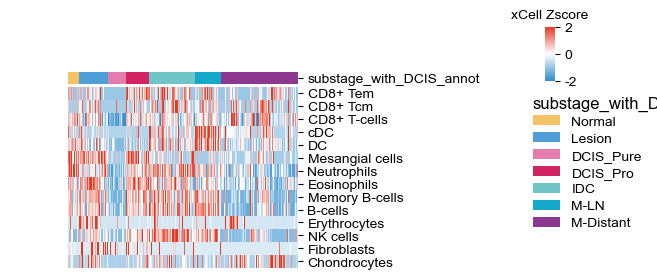

In [4]:
# figure 3B (top)

cmap = mcolors.LinearSegmentedColormap.from_list("blue_red_gradient", ['#348dcd', 'white', '#e83720'], N=256)

cells = ['CD8+ Tem', 'CD8+ Tcm', 'CD8+ T-cells', 'cDC', 'DC', 'Mesangial cells', 'Neutrophils', 'Eosinophils', 'Memory B-cells', 'B-cells', 'Erythrocytes', 'NK cells', 'Fibroblasts', 'Chondrocytes']
plotdata = combine(clinical, xcell, 'substage_with_DCIS_annot', cells, how='inner').droplevel(0).loc[order_].T.rename_axis('cells')
ax = heatmap(plotdata, lut={'substage_with_DCIS_annot': dict(zip(order_, palette))}, z_score=0, cmap=cmap, vmax=2, vmin=-2, figsize=(5, 3), colors_ratio=.05, cbar_pos=(1.1, .75, .02, .18))
ax.ax_cbar.set_title('xCell Zscore', fontsize=10)
ax.savefig('../figure/fig3/figure3B_top-panel_heatmap.pdf', bbox_inches='tight')

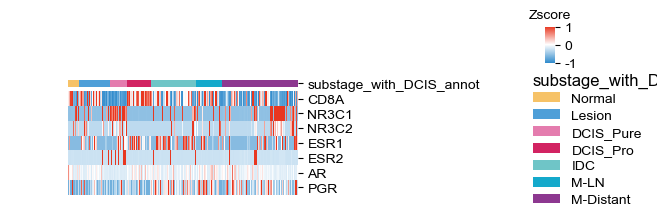

In [5]:
# figure 3B (top-middle)

proteins = ['CD8A', 'NR3C1', 'NR3C2', 'ESR1', 'ESR2', 'AR', 'PGR']
plotdata = combine(clinical, pro, 'substage_with_DCIS_annot', proteins, how='inner').droplevel(0).loc[order_].T.rename_axis('cells')
ax = heatmap(plotdata, lut={'substage_with_DCIS_annot': dict(zip(order_, palette))}, z_score=0, cmap=cmap, vmax=1, vmin=-1, figsize=(5, 2), colors_ratio=.05, cbar_pos=(1.1, .85, .02, .18))
ax.ax_cbar.set_title('Zscore', fontsize=10)
ax.savefig('../figure/fig3/figure3B_top-middle-panel_heatmap.pdf', bbox_inches='tight')

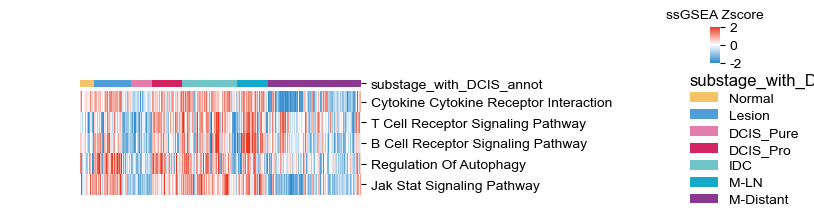

In [6]:
# figure 3B (bottom-middle)

pathways = ['KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION', 'KEGG_T_CELL_RECEPTOR_SIGNALING_PATHWAY', 'KEGG_B_CELL_RECEPTOR_SIGNALING_PATHWAY', 'KEGG_REGULATION_OF_AUTOPHAGY', 'KEGG_JAK_STAT_SIGNALING_PATHWAY']
plotdata = combine(clinical, pscore, 'substage_with_DCIS_annot', pathways, how='inner').droplevel(0).loc[order_].T.rename_axis('cells')
ax = heatmap(plotdata, lut={'substage_with_DCIS_annot': dict(zip(order_, palette))}, z_score=0, cmap=cmap, vmax=2, vmin=-2, figsize=(6.5, 2), colors_ratio=.05, cbar_pos=(1.1, .85, .015, .18), yticklabels=list(map(lambda x: x.split('_', 1)[1].replace('_', ' ').title(), plotdata.index)))
ax.ax_cbar.set_title('ssGSEA Zscore', fontsize=10)
ax.savefig('../figure/fig3/figure3B_bottom-middle-panel_heatmap.pdf', bbox_inches='tight')

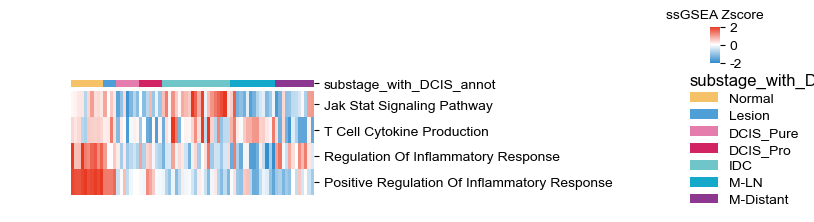

In [7]:
# figure 3B (bottom)

pathways = ['KEGG_JAK_STAT_SIGNALING_PATHWAY', 'GOBP_T_CELL_CYTOKINE_PRODUCTION', 'GOBP_REGULATION_OF_INFLAMMATORY_RESPONSE', 'GOBP_POSITIVE_REGULATION_OF_INFLAMMATORY_RESPONSE']
plotdata = combine(clinical, phoscore, 'substage_with_DCIS_annot', pathways, how='inner').droplevel(0).loc[order_].T.rename_axis('cells')
ax = heatmap(plotdata, lut={'substage_with_DCIS_annot': dict(zip(order_, palette))}, z_score=0, cmap=cmap, vmax=2, vmin=-2, figsize=(6.5, 2), colors_ratio=.05, cbar_pos=(1.1, .85, .015, .18), yticklabels=list(map(lambda x: x.split('_', 1)[1].replace('_', ' ').title(), plotdata.index)))
ax.ax_cbar.set_title('ssGSEA Zscore', fontsize=10)
ax.savefig('../figure/fig3/figure3B_bottom-panel_heatmap.pdf', bbox_inches='tight')

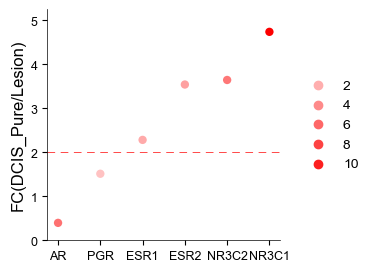

In [8]:
# figure 3C

df = combine(clinical, pro, 'substage_with_DCIS_annot', how='inner', part_element=['DCIS_Pure', 'Lesion'])
out = group_table(df.droplevel(0))
plotdata = out.iloc[:, [2, 3]]
plotdata.iloc[:, 1] = -np.log10(plotdata.iloc[:, 1])
plotdata.columns = ['FC(DCIS_Pure/Lesion)', '-Log10(p value)']
plotdata = plotdata.loc[['AR', 'PGR', 'ESR1', 'ESR2', 'NR3C2', 'NR3C1']].sort_values('FC(DCIS_Pure/Lesion)')

import matplotlib.colors as mcolors

cmap_red = mcolors.LinearSegmentedColormap.from_list("red_gradient", ['#ffc2c2', '#fc0000'], N=256)
ax = scatterplot(plotdata.iloc[:, [1, 0]].reset_index(), ticklabels_format=[], ticklabels_hide=[], palette=cmap_red)
ax.set_ylim([0, ax.get_xlim()[1]])
ax.set_xlabel('')
ax.axhline(y=2, c="red", ls="--", dashes=(11, 8), lw=0.5)
ax.get_figure().savefig('../figure/fig3/figure3C_scatterplot.pdf', bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


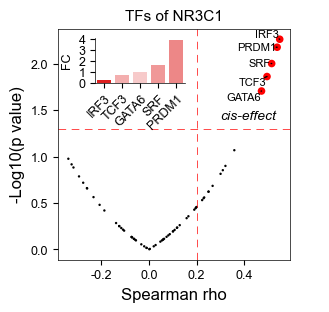

In [9]:
# figure 3D

from functools import reduce
from collections import defaultdict

nr3c1_tf = pd.read_csv('../document/NR3C1_TF.csv', index_col=0).index
nr3c1_tf_overlap = reduce(np.intersect1d, (nr3c1_tf, pro.index, gcnv.index))
clinical_samples = clinical.query("substage_with_DCIS_annot in ['DCIS_Pure', 'Lesion']").index
samples = reduce(np.intersect1d, (clinical_samples, pro.columns, gcnv.columns))
nr3c1_tf_pro = pro.loc[nr3c1_tf_overlap, samples]
nr3c1_tf_cnv = gcnv.loc[nr3c1_tf_overlap, samples]

corr_out = defaultdict(dict)
for gene in nr3c1_tf_overlap:
    *_, rho, prob = correlation(nr3c1_tf_pro.loc[gene], nr3c1_tf_cnv.loc[gene])
    corr_out[gene]['spearman rho'] = rho
    corr_out[gene]['spearman prob'] = prob
plotdata = pd.DataFrame().from_dict(corr_out, orient='index').sort_values('spearman prob')
plotdata.loc[plotdata.iloc[:, 1] < 0.05, 'annot'] = 'cis'
plotdata.loc[:, 'annot'] = plotdata.loc[:, 'annot'].fillna('others')
plotdata.iloc[:, 1] = -np.log10(plotdata.iloc[:, 1])
plotdata.columns = 'Spearman rho', '-Log10(p value)', 'annot'
highlight_points = plotdata.query("annot=='cis'").index.tolist()

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax = scatterplot(plotdata.iloc[:, [0, 2, 1]], sizes=(3, 30), palette=['red', 'black'], highlight_points=highlight_points, ticklabels_format=[], ticklabels_hide=[], spines_hide=[], title='TFs of NR3C1', ax=ax, legend=False)
ax.axhline(y=-np.log10(0.05), c="red", ls="--", dashes=(11, 8), lw=0.5)
ax.axvline(x=.2, c="red", ls="--", dashes=(11, 8), lw=0.5)
ax.text(0.3, 1.4, 'cis-effect', fontdict={'style': 'italic'})

ax1 = fig.add_axes([.25, .7, .3, .15])
df = combine(clinical, pro, 'substage_with_DCIS_annot', how='inner', part_element=['DCIS_Pure', 'Lesion'])
out = group_table(df.droplevel(0), method='median')

nr3c1_cis_table = out.loc[highlight_points, ['DCIS_Pure_vs_Lesion', 'ttest']].sort_values('DCIS_Pure_vs_Lesion')
nr3c1_cis_table['ttest'] = -np.log10(nr3c1_cis_table['ttest'])

from sklearn.preprocessing import MinMaxScaler
cmap_red_5 = mcolors.LinearSegmentedColormap.from_list(
"red_gradient", ['#ffc2c2', '#fc0000'], N=5)

ax1 = barplot(nr3c1_cis_table.iloc[:, 0], palette=list(map(lambda x: cmap_red(x), MinMaxScaler().fit_transform(nr3c1_cis_table['ttest'].values[:, None]))), ticklabels_format=[], ticklabels_hide=[], labels_hide=['x', 'y'], ax=ax1)
ax1.set_ylabel('FC', fontsize=9)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, rotation_mode='anchor', ha='right')
ax1.set_yticks(range(0, 5, 1))
ax1.set_yticklabels(range(0, 5, 1))
fig.savefig('../figure/fig3/figure3D_plot.pdf', bbox_inches='tight')

In [10]:
clinical = pd.read_csv('../document/clinical.csv', index_col=0)


PRDM1 protein and NR3C1 protein spearman rho = 0.51, p value ****
NR3C1 protein and ImmuneScore spearman rho = -0.61, p value ****
NR3C1 protein and TNFa signaling via NFKB spearman rho = -0.57, p value ****


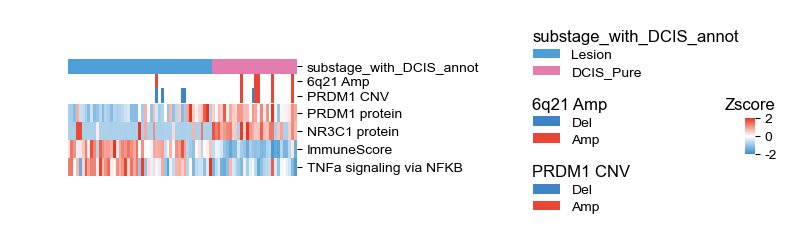

In [11]:
# figure 3E

tmp = pd.concat([cna.loc['6q21'].rename('6q21 Amp'), gcna.loc['PRDM1'].rename('PRDM1 CNV')], axis=1).applymap(lambda x: 'Amp' if x > 0 else ('Del' if x < 0 else ''))
clinical = pd.concat([clinical, tmp], axis=1)
plotdata = pd.concat([clinical[['substage_with_DCIS_annot', '6q21 Amp', 'PRDM1 CNV']].query("substage_with_DCIS_annot in ['Lesion', 'DCIS_Pure']"), pro.loc[['PRDM1', 'NR3C1']].rename(index=lambda x: x + ' protein').T, me.loc['ImmuneScore'], pscore.loc['HALLMARK_TNFA_SIGNALING_VIA_NFKB'].rename('TNFa signaling via NFKB')], axis=1, join='inner').sort_values('substage_with_DCIS_annot', ascending=False).set_index(['substage_with_DCIS_annot', '6q21 Amp', 'PRDM1 CNV'], append=True).T.rename_axis('term')
fig = heatmap(plotdata, lut={'substage_with_DCIS_annot': {'Lesion': '#4e9fd8', 'DCIS_Pure': '#e47cae'}, '6q21 Amp': {'Del': '#3e84c6', 'Amp': '#e94638'}, 'PRDM1 CNV': {'Del': '#3e84c6', 'Amp': '#e94638'}}, z_score=0, cmap=cmap, vmax=2, vmin=-2, figsize=(5, 2), colors_ratio=.1, cbar_pos=(1.5, .3, .02, .18))
fig.ax_cbar.set_title('Zscore')
fig.savefig('../figure/fig3/figure3E_heatmap.pdf', bbox_inches='tight')

for i in [[0, 1], [1, 2], [1, 3]]:
    name1, name2 = plotdata.iloc[i].index
    *_, rho, prob = correlation(plotdata.iloc[i[0]], plotdata.iloc[i[1]])
    print("{} and {} spearman rho = {:.2}, p value {}".format(name1, name2, rho, prob_star(prob)))
fig.savefig('../figure/fig3/figure3E_heatmap.pdf', bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


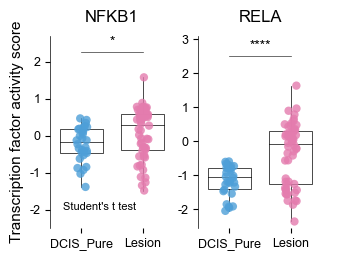

In [12]:
# figure 3F

fig, axs = plt.subplots(1, 2, figsize=(3.5, 2.5))
plt.subplots_adjust(wspace=.2)

plotdata1 = combine(clinical, tf, 'substage_with_DCIS_annot', 'NFKB1', how='inner', part_element=['DCIS_Pure', 'Lesion']).droplevel(0).unstack()
ax = cateplot(plotdata1, dodge=True, log_transform='no', palette=['#4e9fd8', '#e47cae'], ax=axs[0], ticklabels_format=[], labels_hide=['x'])
ax.set_ylabel('Transcription factor activity score', fontsize=11)
ax.set_ylim([-2.5, ax.get_ylim()[1]])
ax.text(-.3, -2, "Student's t test", fontsize=8)
ax.set_title('NFKB1', pad=10)

plotdata2 = combine(clinical, tf, 'substage_with_DCIS_annot', 'RELA', how='inner', part_element=['DCIS_Pure', 'Lesion']).droplevel(0).unstack()
ax = cateplot(plotdata2, dodge=True, log_transform='no', title=gene, palette=['#4e9fd8', '#e47cae'], ax=axs[1], ticklabels_format=[], labels_hide=['x', 'y'])
ax.set_title('RELA', pad=10)
fig.savefig('../figure/fig3/figure3F_cateplot.pdf', bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


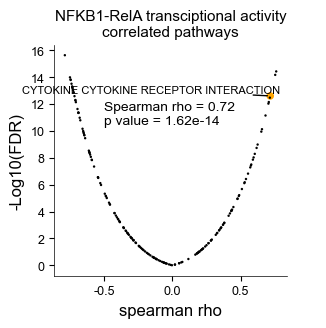

In [13]:
# figure 3G

tmp = combine(clinical, tf, 'substage_with_DCIS_annot', ['NFKB1', 'RELA'], how='inner', part_element=['DCIS_Pure', 'Lesion']).mean(axis=1).rename('NFKB1-RelA')

table = pscore.apply(correlation, y=tmp.droplevel(1), axis=1, result_type='expand')
table.columns = 'pearson corr', 'pearson prob', 'spearman rho', 'spearman prob'
table['spearman fdr'] = fdr(table['spearman prob'])[1]
plotdata = table.filter(like='KEGG', axis=0).sort_values('spearman prob')[['spearman rho', 'spearman fdr']]
text = "Spearman rho = {:.2f}\np value = {:.2e}".format(table.loc['KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION', 'spearman rho'], table.loc['KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION', 'spearman prob'])

plotdata.iloc[:, 1] = -np.log10(plotdata.iloc[:, 1])
plotdata.loc['KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION', 'annot'] = 'annotated'
plotdata.loc[:, 'annot'] = plotdata.loc[:, 'annot'].fillna('others')
plotdata['size'] = plotdata['annot']
ax = scatterplot(plotdata.iloc[:, [0, 2, 1]], highlight_points=['KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION'], title='NFKB1-RelA transciptional activity\ncorrelated pathways', palette=['black', 'orange'], sizes=[3, 30], ticklabels_format=[], ticklabels_hide=[], legend=False)
ax.set_ylabel('-Log10(FDR)')
ax.text(-.5, 10.5, text)
ax.get_figure().savefig('../figure/fig3/figure3G_scatterplot.pdf', bbox_inches='tight')

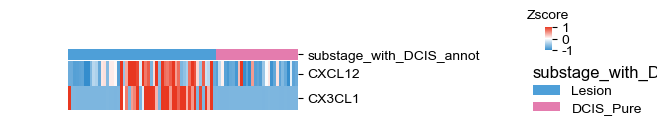

In [14]:
# figure 3H

plotdata = combine(clinical, pro, 'substage_with_DCIS_annot', ['CXCL12', 'CX3CL1'], how='inner', part_element=['DCIS_Pure', 'Lesion']).sort_index(level=1, axis=0, ascending=False).T
fig = heatmap(plotdata, lut={'substage_with_DCIS_annot': {'Lesion': '#4e9fd8', 'DCIS_Pure': '#e47cae'}}, z_score=0, cmap=cmap, figsize=(5, 1.3), colors_ratio=.14, cbar_pos=(1.1, .75, .013, .18))
fig.ax_cbar.set_title('Zscore', fontsize=10)
fig.savefig('../figure/fig3/figure3H_heatmap.pdf', bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


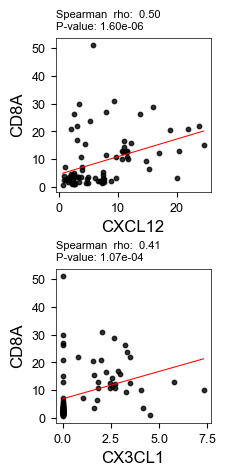

In [15]:
# figure 3I

fig, axs = plt.subplots(2, 1, figsize=(2, 5))
plt.subplots_adjust(hspace=.5)
for i, gene in enumerate(['CXCL12', 'CX3CL1']):
    plotdata = combine(clinical, pro, 'substage_with_DCIS_annot', [gene, 'CD8A'], how='inner', part_element=['DCIS_Pure', 'Lesion']).droplevel(1)
    regplot(plotdata, ci=0, ax=axs.ravel()[i], scattersize=10)
fig.savefig('../figure/fig3/figure3I_regplot.pdf', bbox_inches='tight')